In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [5]:
# Carregar o dataset
df = pd.read_csv('data/origem_carros.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   displacement  392 non-null    int64 
 2   horsepower    392 non-null    int64 
 3   weigth        392 non-null    int64 
 4   acceleration  392 non-null    int64 
 5   origin        392 non-null    object
dtypes: int64(5), object(1)
memory usage: 18.5+ KB


(None,
    mpg  displacement  horsepower  weigth  acceleration    origin
 0   35            72          69    1613            18  japanese
 1   31            76          52    1649            17  japanese
 2   39            79          58    1755            17  japanese
 3   35            81          60    1760            16  japanese
 4   31            71          65    1773            19  japanese)

In [6]:
# Separar variáveis preditoras (X) e variável alvo (y)
X = df.drop(columns=['origin'])
y = df['origin']

In [7]:
# Dividir o dataset em conjunto de treino e teste (75% treino, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [8]:
# Treinar um modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Prever nos dados de teste
y_pred = clf.predict(X_test)

In [11]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nPrecisão do modelo:", accuracy)
print("\nRelatório de classificação:\n", report)


Precisão do modelo: 0.8163265306122449

Relatório de classificação:
               precision    recall  f1-score   support

    american       0.94      0.89      0.91        53
    european       0.69      0.58      0.63        19
    japanese       0.69      0.85      0.76        26

    accuracy                           0.82        98
   macro avg       0.77      0.77      0.77        98
weighted avg       0.82      0.82      0.82        98



In [12]:
# Exibir a árvore de decisão em formato textual
tree_rules = tree.export_text(clf, feature_names=list(X.columns))
print("\nRegras da árvore de decisão:\n", tree_rules)


Regras da árvore de decisão:
 |--- displacement <= 134.50
|   |--- displacement <= 87.00
|   |   |--- acceleration <= 21.50
|   |   |   |--- weigth <= 1969.00
|   |   |   |   |--- mpg <= 30.00
|   |   |   |   |   |--- class: european
|   |   |   |   |--- mpg >  30.00
|   |   |   |   |   |--- displacement <= 85.50
|   |   |   |   |   |   |--- mpg <= 35.00
|   |   |   |   |   |   |   |--- class: japanese
|   |   |   |   |   |   |--- mpg >  35.00
|   |   |   |   |   |   |   |--- acceleration <= 18.00
|   |   |   |   |   |   |   |   |--- class: japanese
|   |   |   |   |   |   |   |--- acceleration >  18.00
|   |   |   |   |   |   |   |   |--- class: european
|   |   |   |   |   |--- displacement >  85.50
|   |   |   |   |   |   |--- class: american
|   |   |   |--- weigth >  1969.00
|   |   |   |   |--- class: japanese
|   |   |--- acceleration >  21.50
|   |   |   |--- class: american
|   |--- displacement >  87.00
|   |   |--- weigth <= 2671.00
|   |   |   |--- displacement <= 90.50
| 

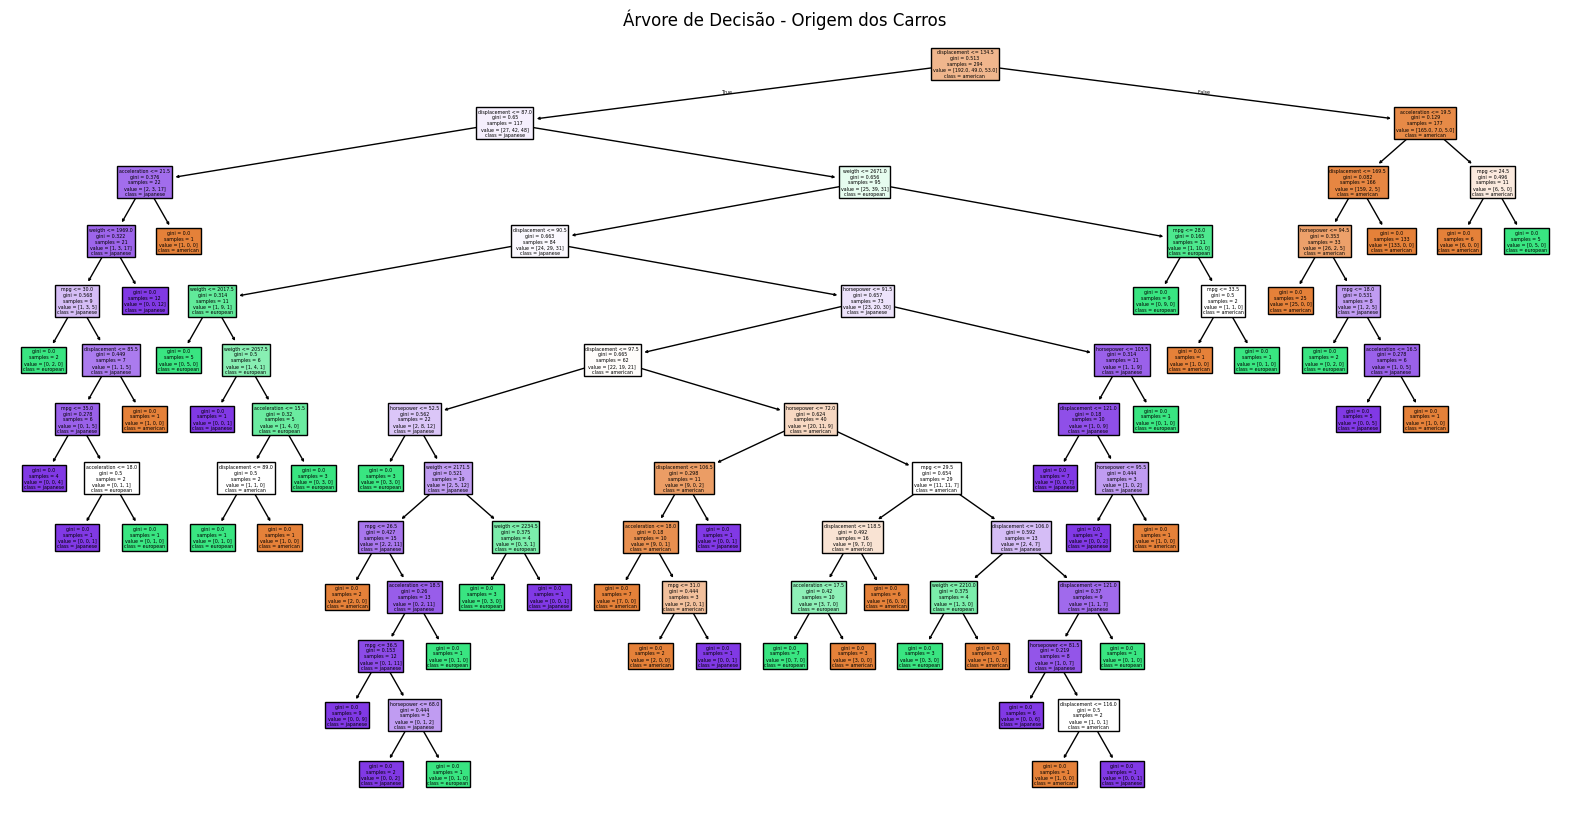

In [13]:
# Gerar a visualização gráfica da árvore de decisão
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=clf.classes_, filled=True)
plt.title("Árvore de Decisão - Origem dos Carros")
plt.show()


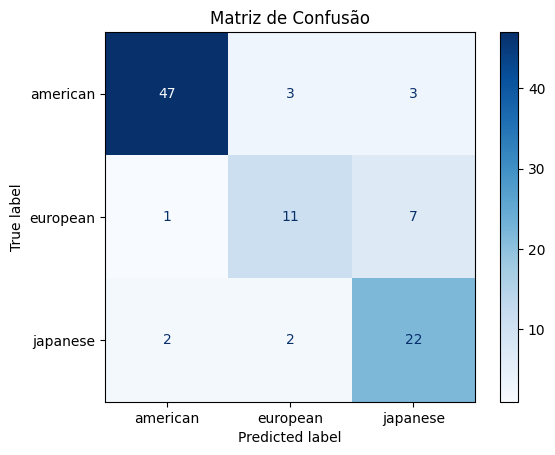

In [15]:
# Gerar matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=clf.classes_, cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

O modelo de árvore de decisão alcançou uma precisão de 81,6% nos dados de teste. A análise dos resultados com base no relatório de classificação revela que:

Americanos: A precisão (94%) e recall (89%) são bastante elevados, indicando que o modelo é eficaz na identificação de carros de origem americana.
Europeus: A precisão (69%) e o recall (58%) são relativamente mais baixos, sugerindo que o modelo tem mais dificuldade em identificar corretamente carros de origem europeia.
Japoneses: A precisão (69%) e o recall (85%) indicam que, embora o modelo tenha uma taxa mais elevada de falsos positivos, consegue identificar a maioria dos carros de origem japonesa.
A árvore de decisão resultante mostra que a característica mais importante para determinar a origem de um carro é o deslocamento do motor. A seguir, o modelo avalia variáveis como o peso, a aceleração e a eficiência de combustível (mpg) para distinguir entre carros de diferentes origens.

A árvore toma decisões como:

Carros com deslocamento maior que 134.50 tendem a ser de origem americana.
Carros com deslocamento menor ou igual a 87 e peso inferior a 1969 kg são mais propensos a serem japoneses ou europeus, dependendo de outros fatores como o consumo de combustível (mpg).